In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [22]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print(f"Training Set: {X_train.shape}\n\nTesting Set: {X_test.shape}")

Training Set: (50000, 32, 32, 3)

Testing Set: (10000, 32, 32, 3)


### There are 50000 training images and 1000 test images

In [23]:
y_train = y_train.reshape(-1,) # y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_test = y_test.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

## Visualizing Dataset

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.title(f"True Label: {classes[y[index]]}")
    plt.axis("off")
    plt.show()

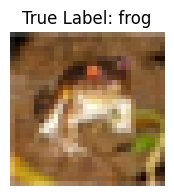

In [25]:
plot_sample(X_train, y_train, 0)

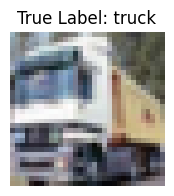

In [26]:
plot_sample(X_train, y_train, 1)

## Normalization

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Building a simple image classification ANN

In [28]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8106 - accuracy: 0.3566
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6239 - accuracy: 0.4261
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5443 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4837 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4352 - accuracy: 0.4952


In [29]:
ann_acc = ann.evaluate(X_test,y_test)
f"Accuray: {ann_acc[1] * 100}" 

313/313 [==============================] - 1s 3ms/step - loss: 1.5771 - accuracy: 0.4476


'Accuray: 44.760000705718994'

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.25      0.37      1000
           1       0.77      0.36      0.49      1000
           2       0.33      0.41      0.37      1000
           3       0.30      0.31      0.31      1000
           4       0.36      0.38      0.37      1000
           5       0.36      0.42      0.39      1000
           6       0.43      0.68      0.53      1000
           7       0.52      0.54      0.53      1000
           8       0.52      0.69      0.59      1000
           9       0.64      0.42      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.44     10000
weighted avg       0.49      0.45      0.44     10000



## Building a Convolutional Neural Network (CNN)

In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4487 - accuracy: 0.4785
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1037 - accuracy: 0.6122
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9705 - accuracy: 0.6617
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8751 - accuracy: 0.6964
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8034 - accuracy: 0.7238
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7405 - accuracy: 0.7424
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6868 - accuracy: 0.7610
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6328 - accuracy: 0.7803
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5873 - accuracy: 0.7964
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.541

In [32]:
cnn_acc = cnn.evaluate(X_test,y_test)
f"Accuray: {cnn_acc[1] * 100}" 

313/313 [==============================] - 1s 3ms/step - loss: 0.9773 - accuracy: 0.6910


'Accuray: 69.0999984741211'

In [33]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

y_classes[:5]

313/313 [==============================] - 1s 3ms/step


[3, 8, 8, 0, 6]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

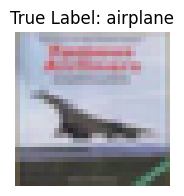

In [35]:
plot_sample(X_test, y_test,3)

In [36]:
acc_diff = round((cnn_acc[1] - ann_acc[1]) * 100, 4)
f"We got an accuracy difference of {acc_diff}%"

'We got an accuracy difference of 24.34%'